In [20]:
include("../ntl.jl")
import Random

using LinearAlgebra
Random.seed!(3)

dirichlet_scale = ones(Float64, 10)
data_parameters = Ntl.Models.MultinomialParameters(10, dirichlet_scale)

psi_prior = Vector{Float64}([1, 1])
phi_prior = Vector{Float64}([1, 1])
geometric_arrival = Ntl.Models.GeometricArrivals(prior=phi_prior, sample_parameter_posterior=true)
ntl_cluster_parameters = Ntl.Models.NtlParameters(psi_prior, geometric_arrival)

mixture_model = Ntl.Models.Mixture(ntl_cluster_parameters, data_parameters)
n = 5
mixture = Ntl.Generate.generate(mixture_model, n=n)
data = Matrix(transpose(Matrix(mixture[:, 2:end])))
training_data = data[:, 1:n]
true_clustering = mixture[:, 1]
true_number_of_clusters = length(unique(true_clustering))

2

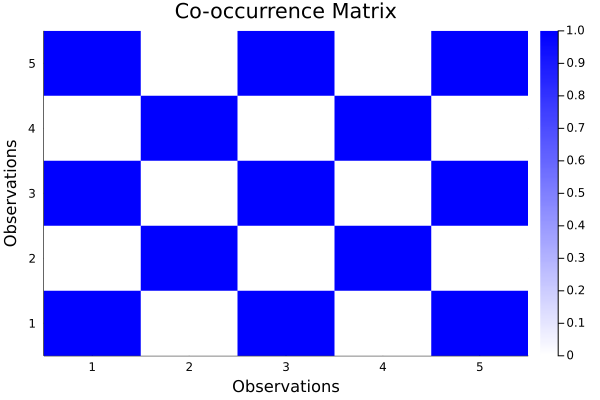

In [2]:
Ntl.Plot.plot_co_occurrence_matrix(true_clustering)


In [22]:
ntl_cluster_parameters = Ntl.Models.NtlParameters(psi_prior, geometric_arrival)
gibbs_sampler = Ntl.Samplers.GibbsSampler(num_iterations=1000000, num_burn_in=100000, skip=1,
                                          assignment_types=["all same cluster"])
gibbs_output = Ntl.Fitter.fit(training_data, mixture_model, gibbs_sampler)

Progress: 100%|█████████████████████████████████████████| Time: 0:01:36


Dict{String, Array} with 3 entries:
  "assignments"       => [1 1 … 1 1; 1 1 … 1 2; … ; 1 1 … 3 2; 1 1 … 5 1]
  "arrival posterior" => [0.0735723; 0.0676987; … ; 0.206367; 0.432629]
  "log likelihood"    => [-114.98; -114.98; … ; -119.698; -115.826]

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


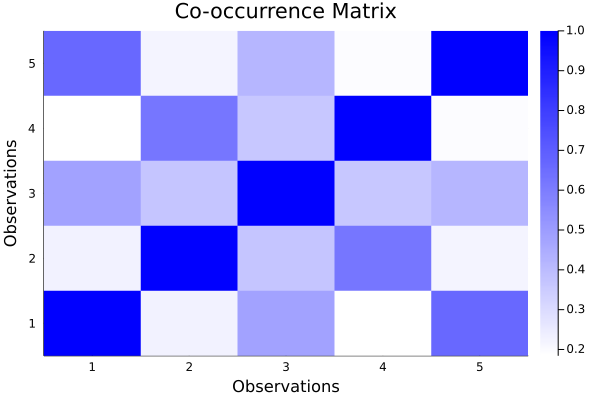

In [23]:
Ntl.Plot.plot_co_occurrence_matrix(gibbs_output["assignments"][:, :, 1])

In [24]:
all_clusterings = Ntl.Utils.generate_all_clusterings(n)
for clustering in all_clusterings 
    true_clustering_posterior_probability = Ntl.Evaluate.compute_posterior_probability(clustering, data, mixture_model)
    println("True posterior probability = $true_clustering_posterior_probability")
    gibbs_probability = Ntl.Evaluate.compute_posterior_probability_confidence_interval(clustering, gibbs_output["assignments"][:, :, 1])
    println("Gibbs posterior probability = $gibbs_probability")
    println()
end

True posterior probability = 0.2210834556837785
Gibbs posterior probability = [0.14937209930510512, 0.1519819006948949]

True posterior probability = 0.018498322028470973
Gibbs posterior probability = [0.012327912816509716, 0.012746087183490283]

True posterior probability = 0.036996644056941495
Gibbs posterior probability = [0.025604020753864334, 0.02618597924613567]

True posterior probability = 0.0017209543026691675
Gibbs posterior probability = [0.0011372579407204356, 0.0012707420592795644]

True posterior probability = 0.0047958612666404955
Gibbs posterior probability = [0.004234897019151652, 0.004495102980848348]

True posterior probability = 0.0006883817210676566
Gibbs posterior probability = [0.0006003474842109915, 0.0007016525157890085]

True posterior probability = 0.007027230069232351
Gibbs posterior probability = [0.006297490930315718, 0.006600509069684282]

True posterior probability = 0.0010325725816014953
Gibbs posterior probability = [0.0008727972207266788, 0.0009932027

In [15]:
all_clusterings

52-element Vector{Vector{Vector{Int64}}}:
 [[1, 2, 3, 4, 5]]
 [[1, 2, 3, 4], [5]]
 [[1, 2, 3, 5], [4]]
 [[1, 2, 3], [4, 5]]
 [[1, 2, 4, 5], [3]]
 [[1, 2, 4], [3, 5]]
 [[1, 2, 5], [3, 4]]
 [[1, 2], [3, 4, 5]]
 [[1, 3, 4, 5], [2]]
 [[1, 3, 4], [2, 5]]
 [[1, 3, 5], [2, 4]]
 [[1, 3], [2, 4, 5]]
 [[1, 4, 5], [2, 3]]
 ⋮
 [[1], [2], [3, 4, 5]]
 [[1, 2], [3], [4], [5]]
 [[1, 3], [2], [4], [5]]
 [[1], [2, 3], [4], [5]]
 [[1, 4], [2], [3], [5]]
 [[1], [2, 4], [3], [5]]
 [[1], [2], [3, 4], [5]]
 [[1, 5], [2], [3], [4]]
 [[1], [2, 5], [3], [4]]
 [[1], [2], [3, 5], [4]]
 [[1], [2], [3], [4, 5]]
 [[1], [2], [3], [4], [5]]

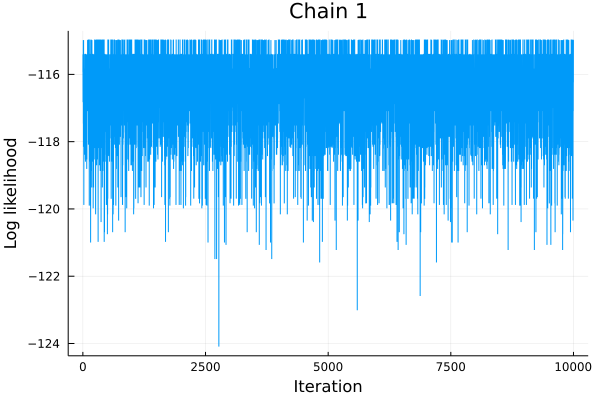

In [166]:
Ntl.Plot.plot_log_likelihoods(gibbs_output["log likelihood"])

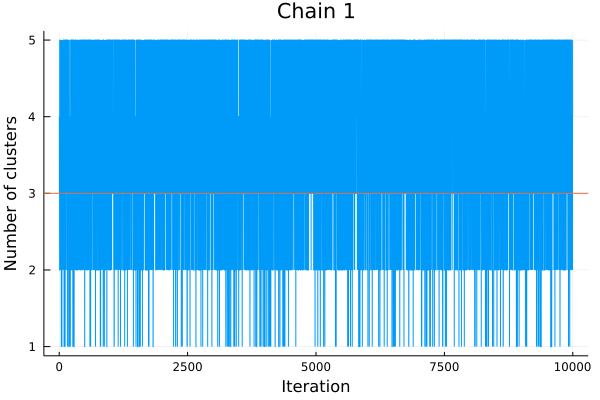

In [154]:
Ntl.Plot.plot_num_clusters(gibbs_output["assignments"], true_number=true_number_of_clusters)

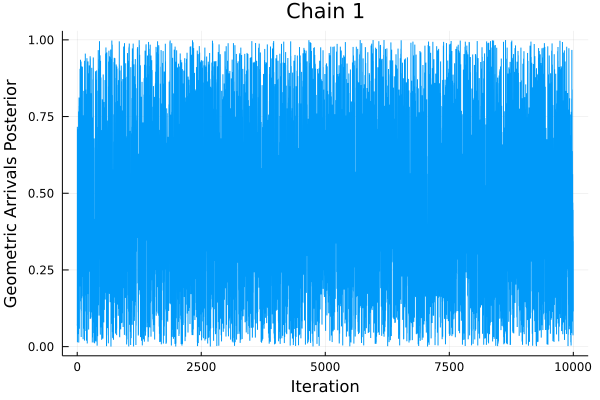

In [142]:
Ntl.Plot.plot_trace(gibbs_output["arrival posterior"], ylabel="Geometric Arrivals Posterior")

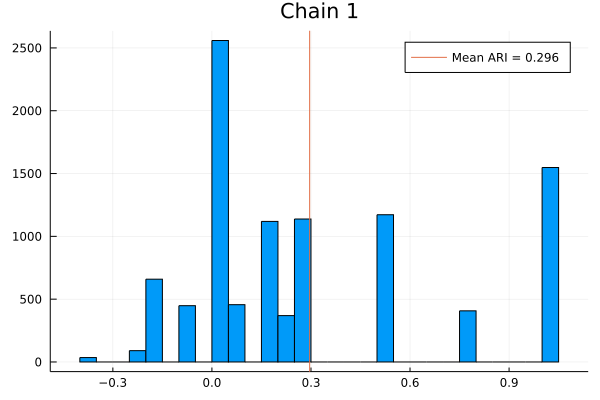

In [171]:
Ntl.Plot.plot_ari_posterior_distribution(true_clustering, gibbs_output["assignments"])

Progress: 100%|█████████████████████████████████████████| Time: 0:00:46


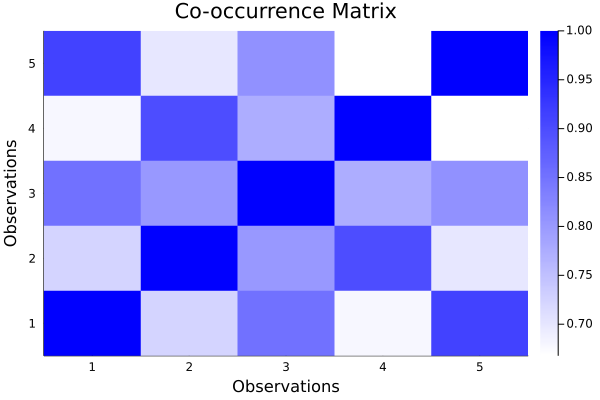

In [3]:
metropolis_hastings_sampler = Ntl.Samplers.MetropolisHastingsSampler(num_iterations=1000000, num_burn_in=100000, proposal_radius=100, skip=100, adaptive=false,
                                                                     assignment_types=["random"])
mcmc_output = Ntl.Fitter.fit(training_data, mixture_model, metropolis_hastings_sampler) 
Ntl.Plot.plot_co_occurrence_matrix(mcmc_output["assignments"][:, :, 1])

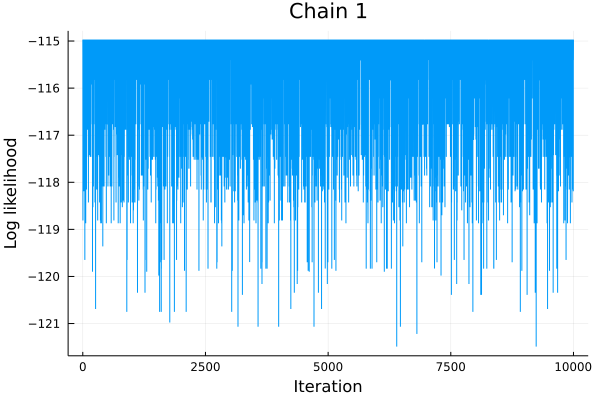

In [4]:
Ntl.Plot.plot_log_likelihoods(mcmc_output["log likelihood"])

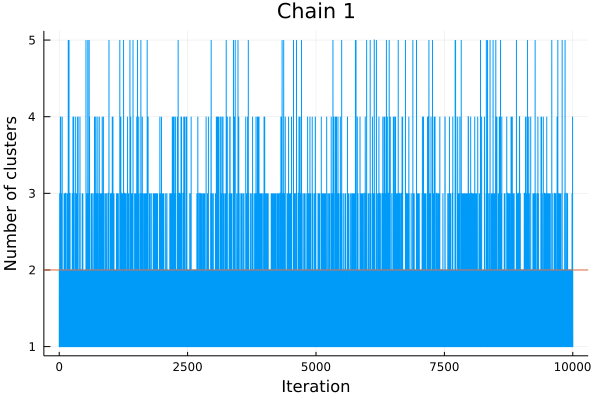

In [5]:
Ntl.Plot.plot_num_clusters(mcmc_output["assignments"], true_number=true_number_of_clusters)

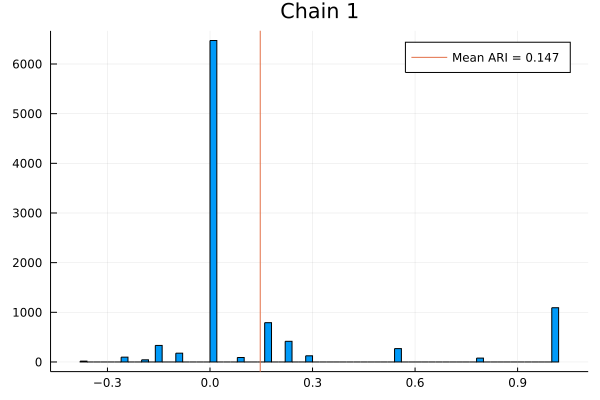

In [6]:
Ntl.Plot.plot_ari_posterior_distribution(true_clustering, mcmc_output["assignments"])

In [7]:
mcmc_conf = Ntl.Evaluate.compute_posterior_probability_confidence_interval(true_clustering, mcmc_output["assignments"][:, :, 1])
println("MCMC Conf int = $mcmc_conf")

MCMC Conf int = [0.10294162591224988, 0.11545837408775013]
